In [ ]:
Linear Regression Example by Sentdex
https://www.youtube.com/watch?v=JcI5Vnw0b2c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=3&ab_channel=sentdex


In [46]:
import pandas as pd
import math, quandl, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [66]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'

forecast_out = math.ceil(0.01*len(df))
df['label'] = df[forecast_col].shift(-forecast_out)


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN
2018-03-26,1054.09,4.818025,0.332191,3272409.0,NaN
2018-03-27,1006.94,6.707965,-5.353887,2940957.0,NaN


In [71]:
df.shape

(3424, 5)

In [81]:
y = np.array(df['label'])
X = np.array(df.drop(['label'],1))
X.shape

(3424, 4)

In [82]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = y[:-forecast_out]
X.shape

(3389, 4)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [84]:
print(accuracy)

0.9773856027233355


In [85]:
forecast_set = clf.predict(X_lately)
forecast_set

array([1099.66010045, 1071.51331785, 1016.99417898, 1057.23169736,
       1072.6505598 , 1073.42257379, 1091.13032664, 1109.64452782,
       1114.7923724 , 1122.23960497, 1132.0019394 , 1128.83450027,
       1147.71258577, 1164.09993943, 1135.13394888, 1121.78699466,
       1086.07760614, 1101.4881204 , 1113.21191982, 1121.00843572,
       1134.13643787, 1149.70174533, 1180.23184437, 1185.68221281,
       1155.96709568, 1168.70115226, 1169.49927286, 1152.43114176,
       1117.04900771, 1114.03297664, 1112.72619281, 1068.76002499,
       1041.25532337, 1068.72637518, 1017.28892308])

In [86]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] +[i]

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849,NaN


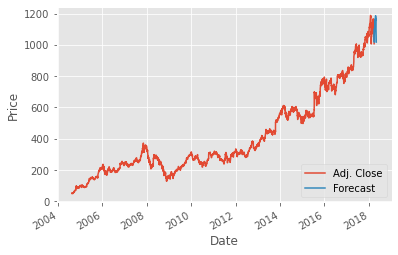

In [87]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()